In [312]:
pip install prince


Note: you may need to restart the kernel to use updated packages.


In [313]:
pip install scikit-learn-extra


Note: you may need to restart the kernel to use updated packages.


In [314]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize,MinMaxScaler,OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score
from scipy import stats
from prince import MCA
from statsmodels.stats.multitest import multipletests
from sklearn.preprocessing import RobustScaler


In [316]:
df=pd.read_csv("/Users/mohamedshoala/Documents/third semester/e health methods and applications/project/project data/dataset_project_eHealth20232024.csv")
print(df.info)
print(f'nan in the df: {df.isnull().sum().sum()}')
print(f'rows with at least 1 nan: {df.isnull().T.any().T.sum()}')
print(f'columns with at least 1 nan: \n{df.isnull().any()}')



<bound method DataFrame.info of       age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0    42.0       1        5.0        1   18000      0    0.0    1.0      0   
1    51.0       3       18.0        1   23000      0    0.0    0.0      0   
2    40.0       0        8.0        1   10000      0    0.0    0.0      0   
3    19.0       0       25.0        5   31000      2    1.0    0.0      0   
4    42.0       2       13.0        1   40000      0    NaN    0.0      0   
..    ...     ...        ...      ...     ...    ...    ...    ...    ...   
155  29.0       2       18.0        0   25000      0    2.0    0.0      2   
156  40.0       1       13.0        5   27000      2    1.0    2.0      0   
157  40.0       0       13.0        0   26000      0    0.0    2.0      1   
158  41.0       1        8.0        1   11000      0    NaN    1.0      0   
159  55.0       0        8.0        2   32199      0    0.0    0.0      0   

     phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6

In [317]:
# For other columns, replace missing values with the respective column's median
for column in df.columns:
    median_value = df[column].median()
    df[column].fillna(value=median_value, inplace=True)



In [318]:
print(f'nan in the df: {df.isnull().sum().sum()}')


nan in the df: 0


In [319]:


df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.info)



<bound method DataFrame.info of       age  gender  education  marital  income  phq_1  phq_2  phq_3  phq_4  \
0    42.0       1        5.0        1   18000      0    0.0    1.0      0   
1    51.0       3       18.0        1   23000      0    0.0    0.0      0   
2    40.0       0        8.0        1   10000      0    0.0    0.0      0   
3    19.0       0       25.0        5   31000      2    1.0    0.0      0   
4    42.0       2       13.0        1   40000      0    0.0    0.0      0   
..    ...     ...        ...      ...     ...    ...    ...    ...    ...   
145  29.0       2       18.0        0   25000      0    2.0    0.0      2   
146  40.0       1       13.0        5   27000      2    1.0    2.0      0   
147  40.0       0       13.0        0   26000      0    0.0    2.0      1   
148  41.0       1        8.0        1   11000      0    0.0    1.0      0   
149  55.0       0        8.0        2   32199      0    0.0    0.0      0   

     phq_5  ...  ccs_3  ccs_4  ccs_5  ccs_6

In [320]:


col_phq = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9']
sum_phq = []
for row_index in range(150):
    row_sum = df.loc[row_index, col_phq].sum()
    sum_phq.append(row_sum)
print(f'phq sum: {sum_phq}')
# threshold is 10 (over=depression)



phq sum: [2.0, 0.0, 1.0, 5.0, 6.0, 2.0, 7.0, 0.0, 1.0, 9.0, 8.0, 8.0, 9.0, 6.0, 6.0, 6.0, 8.0, 6.0, 5.0, 2.0, 1.0, 1.0, 7.0, 9.0, 5.0, 9.0, 6.0, 7.0, 6.0, 1.0, 2.0, 5.0, 3.0, 6.0, 9.0, 7.0, 5.0, 3.0, 9.0, 0.0, 8.0, 6.0, 2.0, 4.0, 4.0, 1.0, 4.0, 0.0, 5.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 8.0, 4.0, 7.0, 1.0, 4.0, 8.0, 1.0, 6.0, 6.0, 9.0, 6.0, 0.0, 9.0, 4.0, 9.0, 8.0, 4.0, 8.0, 5.0, 8.0, 6.0, 0.0, 9.0, 5.0, 8.0, 7.0, 6.0, 0.0, 0.0, 9.0, 5.0, 7.0, 8.0, 8.0, 1.0, 4.0, 9.0, 4.0, 6.0, 3.0, 3.0, 9.0, 9.0, 1.0, 5.0, 4.0, 6.0, 7.0, 9.0, 6.0, 8.0, 8.0, 8.0, 4.0, 6.0, 2.0, 9.0, 9.0, 1.0, 1.0, 5.0, 1.0, 8.0, 9.0, 5.0, 6.0, 1.0, 1.0, 3.0, 9.0, 4.0, 9.0, 9.0, 8.0, 7.0, 9.0, 5.0, 0.0, 9.0, 5.0, 5.0, 9.0, 8.0, 7.0, 3.0, 7.0, 5.0, 1.0, 7.0, 9.0, 5.0, 1.0, 0.0]


In [321]:
col_gad = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7']
sum_gad = []
for row_index in range(150):
    row_sum = df.loc[row_index, col_gad].sum()
    sum_gad.append(row_sum)
print(f'gad sum: {sum_gad}')
# threshold is 10 (over=anxious)



gad sum: [0.0, 3.0, 4.0, 19.0, 6.0, 3.0, 20.0, 0.0, 4.0, 6.0, 12.0, 19.0, 13.0, 8.0, 6.0, 21.0, 6.0, 8.0, 8.0, 3.0, 0.0, 0.0, 17.0, 20.0, 17.0, 7.0, 5.0, 19.0, 7.0, 2.0, 0.0, 7.0, 0.0, 18.0, 8.0, 13.0, 17.0, 2.0, 7.0, 3.0, 6.0, 17.0, 4.0, 3.0, 7.0, 0.0, 0.0, 2.0, 13.0, 13.0, 7.0, 19.0, 8.0, 8.0, 5.0, 7.0, 7.0, 17.0, 3.0, 15.0, 0.0, 0.0, 6.0, 2.0, 11.0, 10.0, 13.0, 7.0, 1.0, 19.0, 4.0, 19.0, 5.0, 3.0, 7.0, 9.0, 11.0, 16.0, 4.0, 7.0, 12.0, 8.0, 13.0, 13.0, 2.0, 3.0, 11.0, 9.0, 8.0, 17.0, 21.0, 2.0, 2.0, 6.0, 3.0, 19.0, 3.0, 3.0, 7.0, 21.0, 4.0, 20.0, 0.0, 8.0, 9.0, 5.0, 5.0, 10.0, 7.0, 11.0, 4.0, 21.0, 4.0, 6.0, 17.0, 0.0, 1.0, 6.0, 1.0, 15.0, 13.0, 18.0, 8.0, 0.0, 3.0, 1.0, 16.0, 0.0, 17.0, 5.0, 11.0, 5.0, 5.0, 13.0, 2.0, 8.0, 8.0, 7.0, 14.0, 9.0, 15.0, 0.0, 9.0, 10.0, 3.0, 13.0, 7.0, 6.0, 2.0, 3.0]


In [322]:


col_eheals = ['eheals_1', 'eheals_2', 'eheals_3', 'eheals_4', 'eheals_5', 'eheals_6', 'eheals_7', 'eheals_8']
sum_eheals = []
for row_index in range(150):
    row_sum = df.loc[row_index, col_eheals].sum()
    sum_eheals.append(row_sum)
print(f'eheals sum: {sum_eheals}')
# no threshold, its subjective



eheals sum: [17.0, 25.0, 20.0, 40.0, 29.0, 17.0, 33.0, 19.0, 26.0, 29.0, 33.0, 35.0, 40.0, 31.0, 32.0, 36.0, 30.0, 31.0, 31.0, 19.0, 20.0, 19.0, 36.0, 35.0, 35.0, 28.0, 30.0, 39.0, 30.0, 24.0, 24.0, 30.0, 25.0, 34.0, 29.0, 35.0, 33.0, 17.0, 29.0, 19.0, 30.0, 38.0, 17.0, 22.0, 32.0, 20.0, 18.0, 25.0, 34.0, 39.0, 29.0, 37.0, 32.0, 29.0, 32.0, 30.0, 32.0, 33.0, 27.0, 37.0, 25.0, 23.0, 29.0, 24.0, 37.0, 38.0, 33.0, 30.0, 25.0, 38.0, 25.0, 34.0, 29.0, 17.0, 31.0, 29.0, 37.0, 38.0, 21.0, 29.0, 37.0, 31.0, 37.0, 33.0, 28.0, 28.0, 35.0, 29.0, 29.0, 35.0, 37.0, 22.0, 26.0, 31.0, 21.0, 33.0, 23.0, 25.0, 31.0, 35.0, 22.0, 36.0, 19.0, 30.0, 32.0, 32.0, 31.0, 35.0, 30.0, 40.0, 20.0, 39.0, 27.0, 30.0, 33.0, 18.0, 25.0, 32.0, 28.0, 33.0, 39.0, 40.0, 29.0, 23.0, 19.0, 19.0, 35.0, 28.0, 40.0, 31.0, 39.0, 30.0, 30.0, 40.0, 24.0, 29.0, 32.0, 29.0, 34.0, 30.0, 38.0, 27.0, 32.0, 39.0, 27.0, 38.0, 31.0, 32.0, 26.0, 26.0]


In [323]:


col_heas = ['heas_1', 'heas_2', 'heas_3', 'heas_4', 'heas_5', 'heas_6', 'heas_7', 'heas_8', 'heas_9', 'heas_10', 'heas_11', 'heas_12', 'heas_13']
sum_heas = []
for row_index in range(150):
    row_sum = df.loc[row_index, col_heas].sum()
    sum_heas.append(row_sum)
print(f'heas sum: {sum_heas}')
# we have to find the threshold!



heas sum: [8.0, 7.0, 2.0, 20.0, 16.0, 7.0, 17.0, 5.0, 6.0, 18.0, 30.0, 19.0, 32.0, 15.0, 11.0, 28.0, 9.0, 18.0, 16.0, 4.0, 2.0, 0.0, 23.0, 30.0, 22.0, 17.0, 18.0, 24.0, 11.0, 4.0, 2.0, 11.0, 4.0, 28.0, 15.0, 32.0, 19.0, 0.0, 16.0, 1.0, 14.0, 20.0, 4.0, 3.0, 10.0, 7.0, 6.0, 2.0, 21.0, 26.0, 16.0, 24.0, 9.0, 10.0, 9.0, 11.0, 17.0, 23.0, 4.0, 26.0, 5.0, 3.0, 17.0, 1.0, 31.0, 20.0, 21.0, 9.0, 4.0, 24.0, 0.0, 31.0, 13.0, 0.0, 15.0, 17.0, 20.0, 27.0, 2.0, 13.0, 25.0, 14.0, 20.0, 29.0, 1.0, 5.0, 24.0, 12.0, 18.0, 28.0, 20.0, 1.0, 0.0, 9.0, 5.0, 28.0, 0.0, 0.0, 10.0, 20.0, 2.0, 23.0, 5.0, 10.0, 18.0, 17.0, 17.0, 19.0, 9.0, 32.0, 7.0, 30.0, 7.0, 18.0, 29.0, 6.0, 2.0, 9.0, 4.0, 24.0, 23.0, 29.0, 15.0, 1.0, 4.0, 1.0, 30.0, 8.0, 27.0, 17.0, 21.0, 17.0, 14.0, 32.0, 3.0, 9.0, 16.0, 9.0, 20.0, 10.0, 22.0, 6.0, 17.0, 26.0, 3.0, 30.0, 16.0, 10.0, 3.0, 4.0]


In [324]:


# reverse score of ccs 3, 6, 7, 12
df['ccs_3'] = df['ccs_3'].max() - df['ccs_3']
df['ccs_6'] = df['ccs_6'].max() - df['ccs_6']
df['ccs_7'] = df['ccs_7'].max() - df['ccs_7']
df['ccs_12'] = df['ccs_12'].max() - df['ccs_12']

col_ccs = ['ccs_1', 'ccs_2', 'ccs_3', 'ccs_4', 'ccs_5', 'ccs_6', 'ccs_7', 'ccs_8', 'ccs_9', 'ccs_10', 'ccs_11', 'ccs_12']
sum_ccs = []
for row_index in range(150):
    row_sum = df.loc[row_index, col_ccs].sum()
    sum_ccs.append(row_sum)
    # high score=climate change skeptic
print(f'ccs sum: {sum_ccs}')
# we have to find the threshold!



ccs sum: [33.0, 36.0, 38.0, 11.0, 22.0, 38.0, 13.0, 35.0, 36.0, 22.0, 9.0, 15.0, 15.0, 20.0, 18.0, 14.0, 26.0, 18.0, 26.0, 37.0, 34.0, 42.0, 17.0, 12.0, 10.0, 21.0, 20.0, 13.0, 19.0, 36.0, 40.0, 21.0, 42.0, 10.0, 23.0, 11.0, 14.0, 41.0, 25.0, 35.0, 18.0, 15.0, 39.0, 34.0, 20.0, 41.0, 40.0, 35.0, 13.0, 14.0, 19.0, 14.0, 20.0, 21.0, 19.0, 20.0, 19.0, 16.0, 43.0, 8.0, 38.0, 38.0, 20.0, 41.0, 11.0, 10.0, 14.0, 23.0, 39.0, 14.0, 35.0, 15.0, 20.0, 37.0, 23.0, 19.0, 14.0, 17.0, 33.0, 17.0, 12.0, 18.0, 8.0, 17.0, 40.0, 29.0, 14.0, 22.0, 20.0, 18.0, 15.0, 38.0, 37.0, 20.0, 36.0, 12.0, 37.0, 39.0, 22.0, 11.0, 34.0, 16.0, 34.0, 21.0, 21.0, 21.0, 23.0, 16.0, 21.0, 15.0, 37.0, 14.0, 39.0, 23.0, 8.0, 40.0, 34.0, 21.0, 38.0, 12.0, 13.0, 15.0, 24.0, 35.0, 38.0, 38.0, 11.0, 37.0, 14.0, 24.0, 8.0, 18.0, 22.0, 13.0, 38.0, 25.0, 19.0, 19.0, 12.0, 21.0, 16.0, 35.0, 25.0, 15.0, 41.0, 16.0, 21.0, 25.0, 34.0, 33.0]


In [325]:
# creating the new dataframe
df1 = df[[ 'gender', 'education', 'marital',"income","age"]]
data2 = {
    'phq': sum_phq,
    'gad': sum_gad,
    'eheals': sum_eheals,
    'heas': sum_heas,
    'ccs': sum_ccs
}
df2 = pd.DataFrame(data2)
df_sum = pd.concat([df1, df2], axis=1)
df_sum


,gender,education,marital,income,age,phq,gad,eheals,heas,ccs
0,1,5.0,1,18000,42.0,2.0,0.0,17.0,8.0,33.0
1,3,18.0,1,23000,51.0,0.0,3.0,25.0,7.0,36.0
2,0,8.0,1,10000,40.0,1.0,4.0,20.0,2.0,38.0
3,0,25.0,5,31000,19.0,5.0,19.0,40.0,20.0,11.0
4,2,13.0,1,40000,42.0,6.0,6.0,29.0,16.0,22.0
...,...,...,...,...,...,...,...,...,...,...
145,2,18.0,0,25000,29.0,7.0,13.0,38.0,30.0,16.0
146,1,13.0,5,27000,40.0,9.0,7.0,31.0,16.0,21.0
147,0,13.0,0,26000,40.0,5.0,6.0,32.0,10.0,25.0
148,1,8.0,1,11000,41.0,1.0,2.0,26.0,3.0,34.0


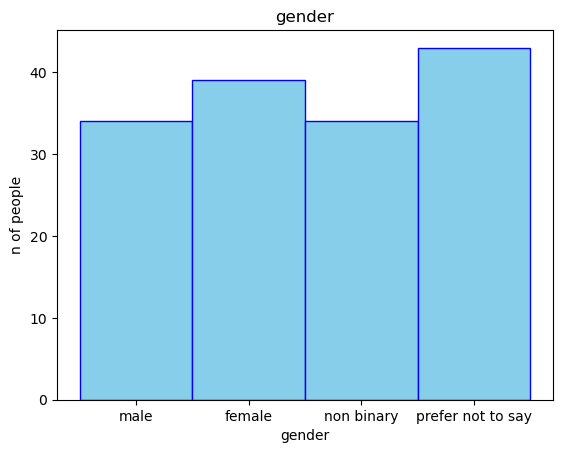

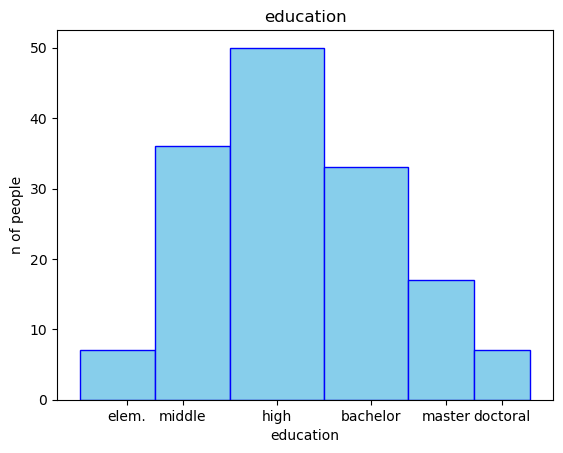

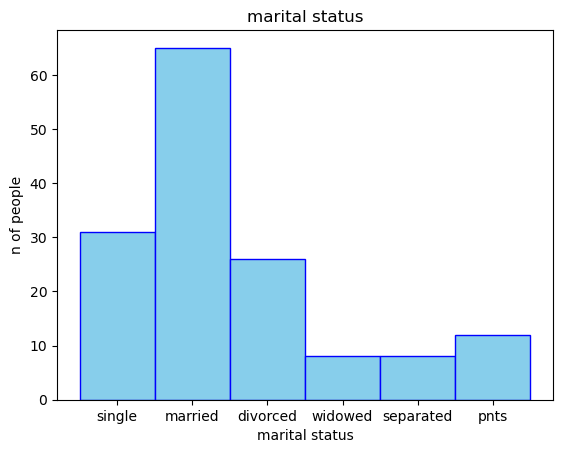

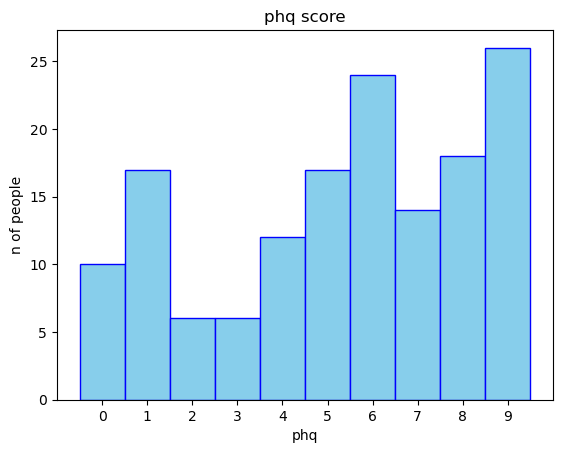

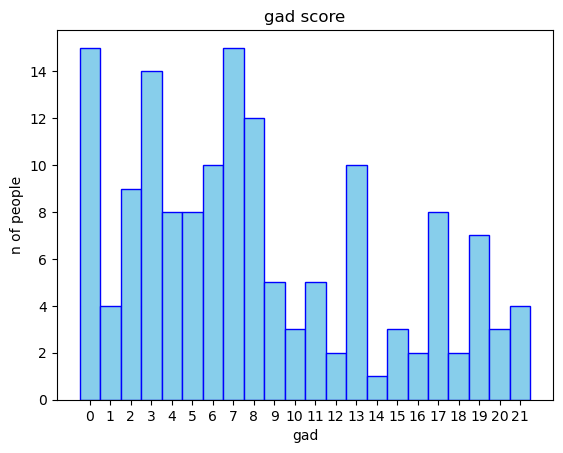

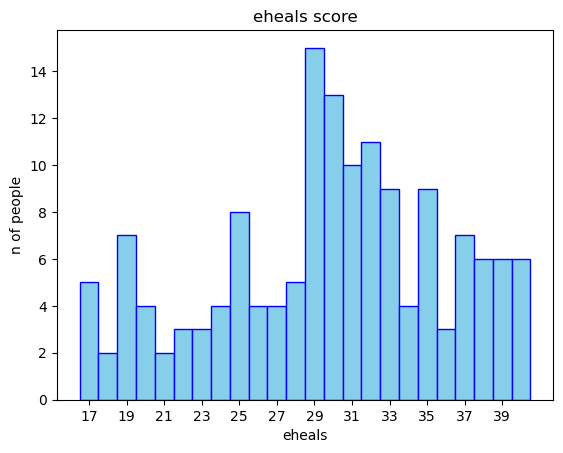

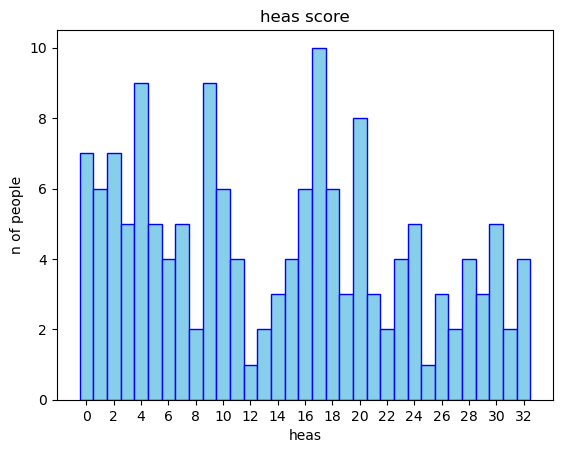

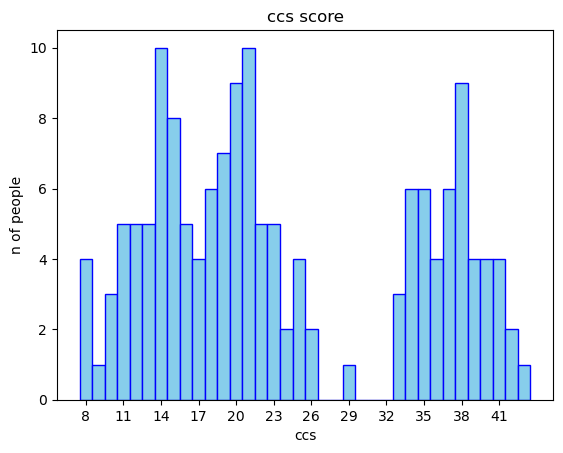

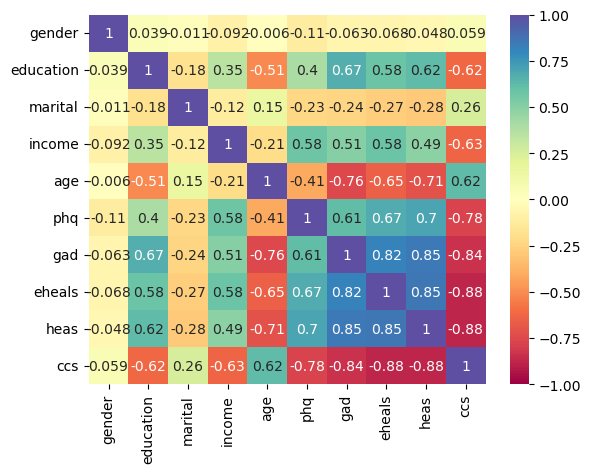

In [326]:


plt.figure(2)
plt.hist(df_sum['gender'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5], color='skyblue', ec='blue')
plt.xlabel('gender')
labels_gen = ['male', 'female', 'non binary', 'prefer not to say']
plt.xticks(ticks=[0, 1, 2, 3], labels=labels_gen)
plt.ylabel('n of people')
plt.title('gender')

plt.figure(3)
bin_centers = [np.mean([bin_left, bin_right]) for bin_left, bin_right in zip([0, 5, 8, 13, 18, 22, 25], [5, 8, 13, 18, 22, 25, 28])]
plt.hist(df_sum['education'], bins=bin_centers, color='skyblue', ec='blue')
plt.xlabel('education')
labels_edu = ['elem.', 'middle', 'high', 'bachelor', 'master', 'doctoral']
plt.xticks(ticks=[5, 8, 13, 18, 22, 25], labels=labels_edu)
plt.ylabel('n of people')
plt.title('education')

plt.figure(4)
plt.hist(df_sum['marital'], bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], color='skyblue', ec='blue')
plt.xlabel('marital status')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['single', 'married', 'divorced', 'widowed', 'separated', 'pnts'])
plt.ylabel('n of people')
plt.title('marital status')



plt.figure(6)
plt.hist(df_sum['phq'],
         bins=np.arange(start=min(df_sum['phq'])-0.5, stop=max(df_sum['phq'])+1.5, step=1),
         color='skyblue', ec='blue')
plt.xlabel('phq')
plt.xticks(ticks=np.arange(min(df_sum['phq']), max(df_sum['phq'])+1, 1))
plt.ylabel('n of people')
plt.title('phq score')

plt.figure(7)
plt.hist(df_sum['gad'],
         bins=np.arange(start=min(df_sum['gad'])-0.5, stop=max(df_sum['gad'])+1.5, step=1),
         color='skyblue', ec='blue')
plt.xlabel('gad')
plt.xticks(ticks=np.arange(min(df_sum['gad']), max(df_sum['gad'])+1, 1))
plt.ylabel('n of people')
plt.title('gad score')

plt.figure(8)
plt.hist(df_sum['eheals'],
         bins=np.arange(start=min(df_sum['eheals'])-0.5, stop=max(df_sum['eheals'])+1.5, step=1),
         color='skyblue', ec='blue')
plt.xlabel('eheals')
plt.xticks(ticks=np.arange(min(df_sum['eheals']), max(df_sum['eheals'])+1, 2))
plt.ylabel('n of people')
plt.title('eheals score')

plt.figure(9)
plt.hist(df_sum['heas'],
         bins=np.arange(start=min(df_sum['heas'])-0.5, stop=max(df_sum['heas'])+1.5, step=1),
         color='skyblue', ec='blue')
plt.xlabel('heas')
plt.xticks(ticks=np.arange(min(df_sum['heas']), max(df_sum['heas'])+1, 2))
plt.ylabel('n of people')
plt.title('heas score')

plt.figure(10)
plt.hist(df_sum['ccs'],
         bins=np.arange(start=min(df_sum['ccs'])-0.5, stop=max(df_sum['ccs'])+1.5, step=1),
         color='skyblue', ec='blue')
plt.xlabel('ccs')
plt.xticks(ticks=np.arange(min(df_sum['ccs']), max(df_sum['ccs'])+1, 3))
plt.ylabel('n of people')
plt.title('ccs score')

# study correlation
plt.figure(11)
sns.heatmap(df_sum.corr(), vmin=-1, vmax=1, center=0, cmap='Spectral', annot=True)
plt.show()

In [327]:
#fig,axs=plt.subplots(4,2,figsize=(15,7))
#sns.histplot(x="gender", data=df_sum, ax=axs[0])

In [328]:
df_numerical=df_sum[["age","income","eheals","heas","ccs","gad","phq"]]
df_numerical

,age,income,eheals,heas,ccs,gad,phq
0,42.0,18000,17.0,8.0,33.0,0.0,2.0
1,51.0,23000,25.0,7.0,36.0,3.0,0.0
2,40.0,10000,20.0,2.0,38.0,4.0,1.0
3,19.0,31000,40.0,20.0,11.0,19.0,5.0
4,42.0,40000,29.0,16.0,22.0,6.0,6.0
...,...,...,...,...,...,...,...
145,29.0,25000,38.0,30.0,16.0,13.0,7.0
146,40.0,27000,31.0,16.0,21.0,7.0,9.0
147,40.0,26000,32.0,10.0,25.0,6.0,5.0
148,41.0,11000,26.0,3.0,34.0,2.0,1.0


In [329]:
import pandas as pd

# Assuming you have your original DataFrame as df_sum
min_values = df_numerical.min()
max_values = df_numerical.max()

# Combine min and max into a single DataFrame for a clearer overview
min_max_values = pd.DataFrame({'Min': min_values, 'Max': max_values})

print(min_max_values)


            Min      Max
age        18.0     55.0
income  10000.0  56000.0
eheals     17.0     40.0
heas        0.0     32.0
ccs         8.0     43.0
gad         0.0     21.0
phq         0.0      9.0


In [330]:
import pandas as pd

# Assuming you have your original DataFrame as df_sum
min_values = df_sum.min()
max_values = df_sum.max()

# Combine min and max into a single DataFrame for a clearer overview
min_max_values = pd.DataFrame({'Min': min_values, 'Max': max_values})

print(min_max_values)


               Min      Max
gender         0.0      3.0
education      5.0     25.0
marital        0.0      5.0
income     10000.0  56000.0
age           18.0     55.0
phq            0.0      9.0
gad            0.0     21.0
eheals        17.0     40.0
heas           0.0     32.0
ccs            8.0     43.0


In [331]:
#scaling_numerical_columns
scaler_robust = RobustScaler()
df_scaled = scaler_robust.fit_transform(df_sum)
df_scaled = pd.DataFrame(df_scaled, columns=df_sum.columns, index=df_sum.index)

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())

   gender  education  marital    income       age  phq  gad    eheals  \
0    -0.5       -0.8      0.0 -0.932203  0.111111 -0.8 -0.7 -1.485714   
1     0.5        0.5      0.0 -0.508475  0.611111 -1.2 -0.4 -0.571429   
2    -1.0       -0.5      0.0 -1.610169  0.000000 -1.0 -0.3 -1.142857   
3    -1.0        1.2      4.0  0.169492 -1.166667 -0.2  1.2  1.142857   
4     0.0        0.0      0.0  0.932203  0.111111  0.0 -0.1 -0.114286   

       heas   ccs  
0 -0.412698  0.60  
1 -0.476190  0.75  
2 -0.793651  0.85  
3  0.349206 -0.50  
4  0.095238  0.05  


In [332]:
df_scaled

,gender,education,marital,income,age,phq,gad,eheals,heas,ccs
0,-0.5,-0.8,0.0,-0.932203,0.111111,-0.8,-0.7,-1.485714,-0.412698,0.60
1,0.5,0.5,0.0,-0.508475,0.611111,-1.2,-0.4,-0.571429,-0.476190,0.75
2,-1.0,-0.5,0.0,-1.610169,0.000000,-1.0,-0.3,-1.142857,-0.793651,0.85
3,-1.0,1.2,4.0,0.169492,-1.166667,-0.2,1.2,1.142857,0.349206,-0.50
4,0.0,0.0,0.0,0.932203,0.111111,0.0,-0.1,-0.114286,0.095238,0.05
...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.5,-1.0,-0.338983,-0.611111,0.2,0.6,0.914286,0.984127,-0.25
146,-0.5,0.0,4.0,-0.169492,0.000000,0.6,0.0,0.114286,0.095238,0.00
147,-1.0,0.0,-1.0,-0.254237,0.000000,-0.2,-0.1,0.228571,-0.285714,0.20
148,-0.5,-0.5,0.0,-1.525424,0.055556,-1.0,-0.5,-0.457143,-0.730159,0.65


In [333]:
category_count = df_scaled['marital'].value_counts()
print(category_count)
category_count = df_sum['marital'].value_counts()
category_count


 0.0    65
-1.0    31
 1.0    26
 4.0    12
 2.0     8
 3.0     8
Name: marital, dtype: int64


1    65
0    31
2    26
5    12
3     8
4     8
Name: marital, dtype: int64

<Axes: >

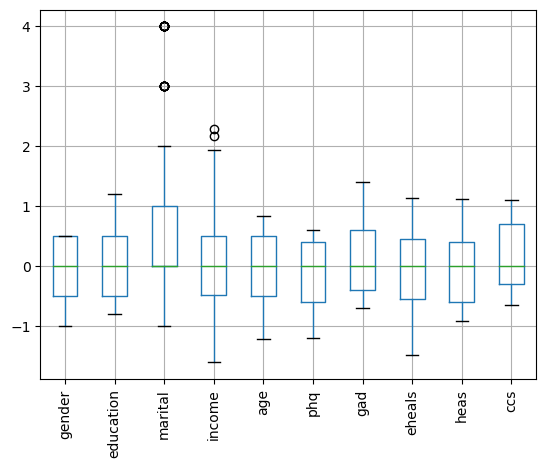

In [334]:
#BOX_PLOT
%matplotlib inline
df_scaled.boxplot(rot=90)

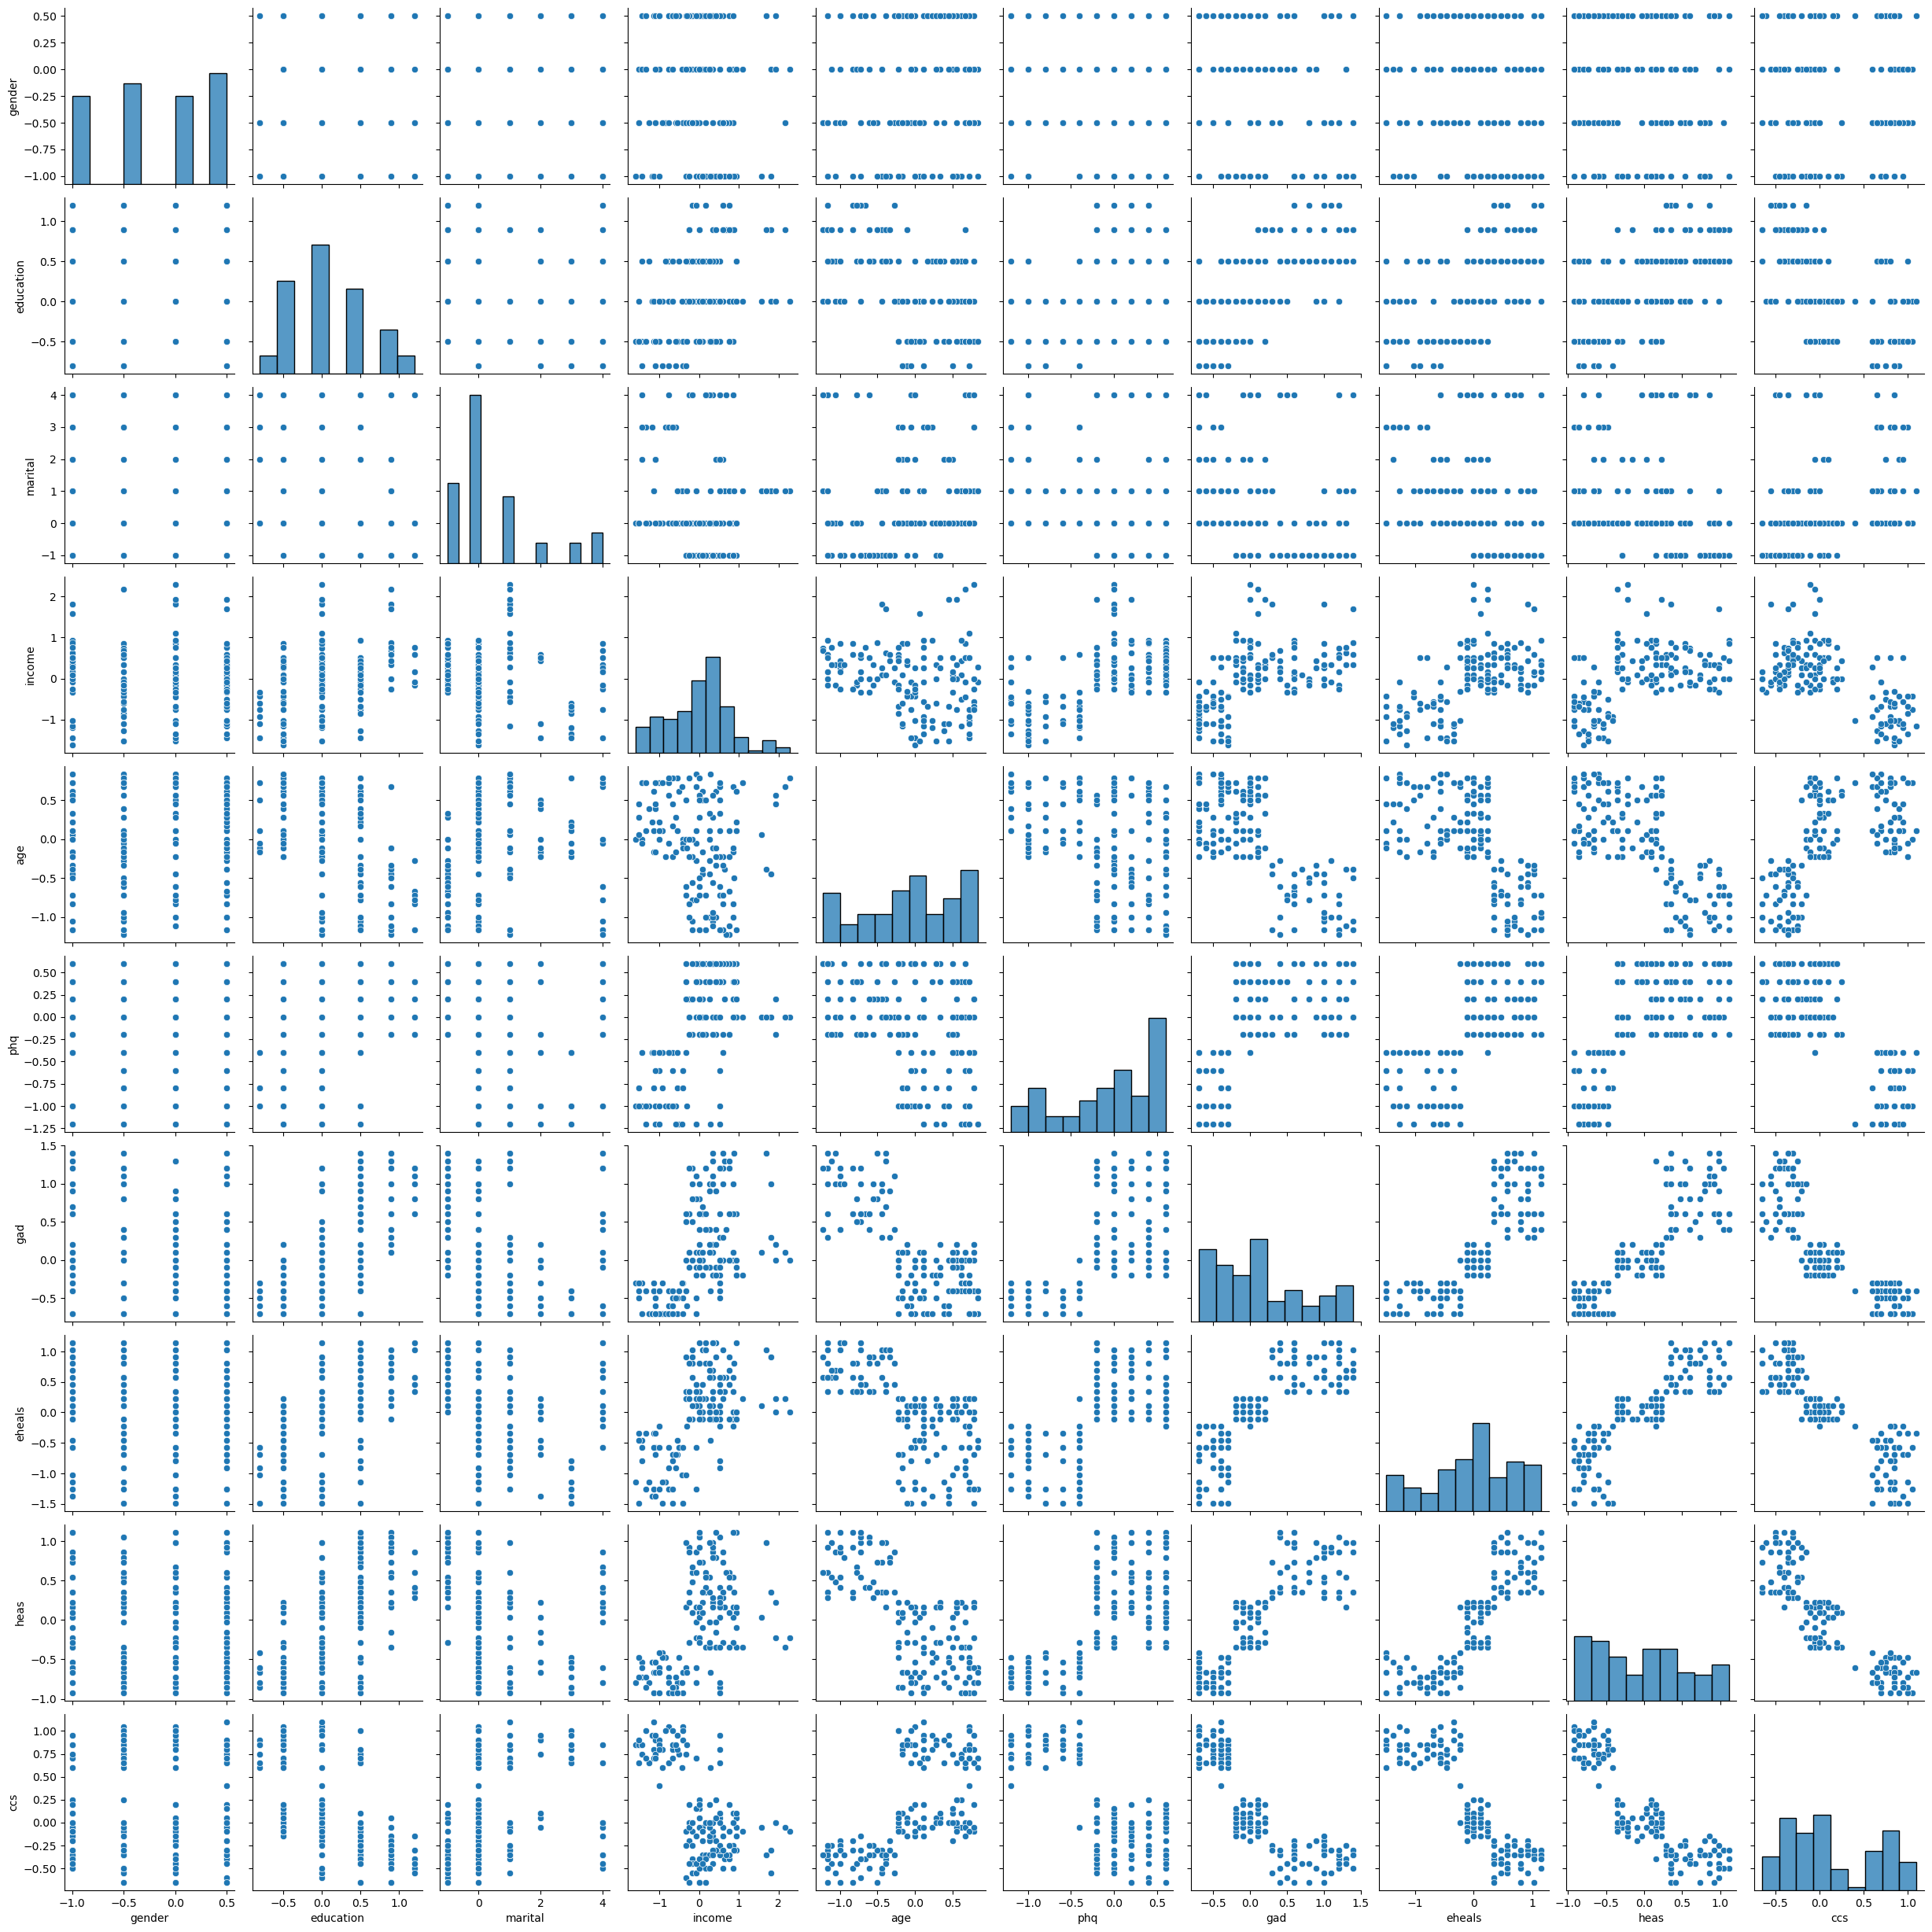

In [335]:
sns.pairplot(df_scaled)
plt.show()

In [336]:
#so after scaling with robust scaler we still have the same representation of all the categories 

In [337]:
# Calculate the medians for each column in the original DataFrame
medians = df_scaled.median()

# List of columns you want to process
columns_to_process = ['income']  # Add the names of the columns you want to process
threshold = 1.5

# Create a copy of the DataFrame without outliers
df_no_outliers = df_scaled.copy()

for column in columns_to_process:
    z_scores = np.abs(stats.zscore(df_no_outliers[column]))
    outliers = (z_scores > threshold)

    # Replace outliers with the median value of the column
    df_no_outliers[column][outliers] = medians[column]

In [338]:
df_no_outliers

,gender,education,marital,income,age,phq,gad,eheals,heas,ccs
0,-0.5,-0.8,0.0,-0.932203,0.111111,-0.8,-0.7,-1.485714,-0.412698,0.60
1,0.5,0.5,0.0,-0.508475,0.611111,-1.2,-0.4,-0.571429,-0.476190,0.75
2,-1.0,-0.5,0.0,0.000000,0.000000,-1.0,-0.3,-1.142857,-0.793651,0.85
3,-1.0,1.2,4.0,0.169492,-1.166667,-0.2,1.2,1.142857,0.349206,-0.50
4,0.0,0.0,0.0,0.932203,0.111111,0.0,-0.1,-0.114286,0.095238,0.05
...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.5,-1.0,-0.338983,-0.611111,0.2,0.6,0.914286,0.984127,-0.25
146,-0.5,0.0,4.0,-0.169492,0.000000,0.6,0.0,0.114286,0.095238,0.00
147,-1.0,0.0,-1.0,-0.254237,0.000000,-0.2,-0.1,0.228571,-0.285714,0.20
148,-0.5,-0.5,0.0,0.000000,0.055556,-1.0,-0.5,-0.457143,-0.730159,0.65


<Axes: >

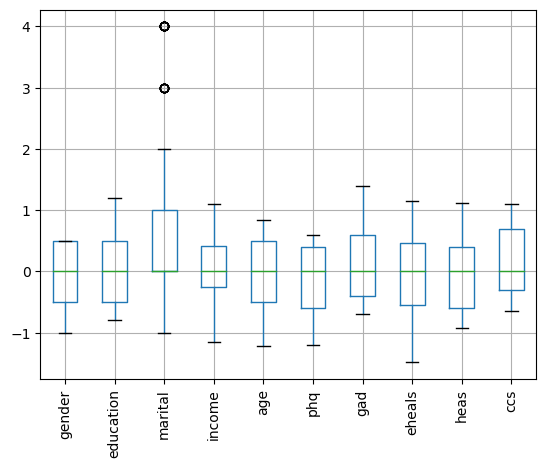

In [339]:
#BOX_PLOT
%matplotlib inline
df_no_outliers.boxplot(rot=90)

In [340]:
if df_no_outliers.isna().values.any():
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values in the DataFrame.")


No NaN values in the DataFrame.


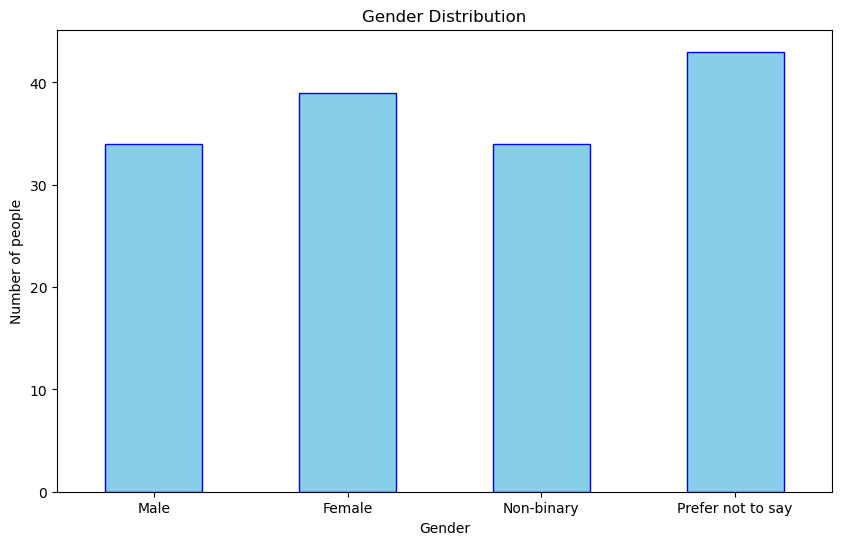

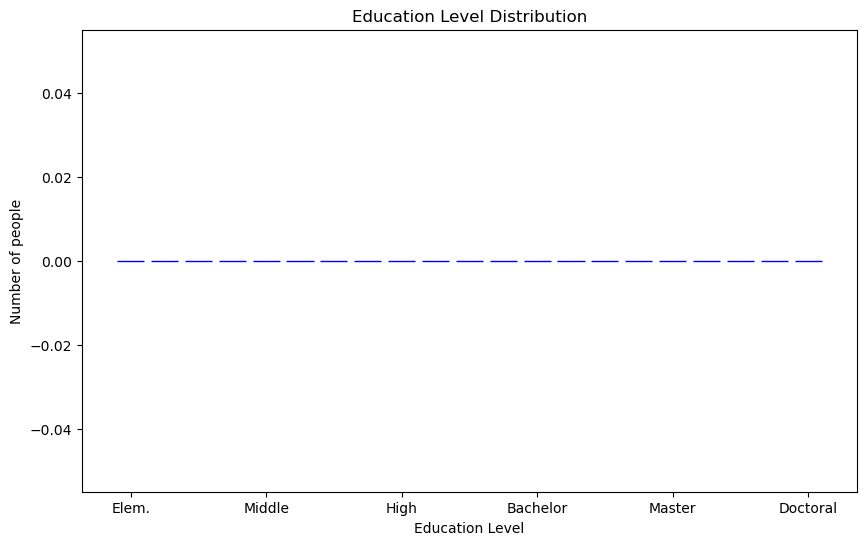

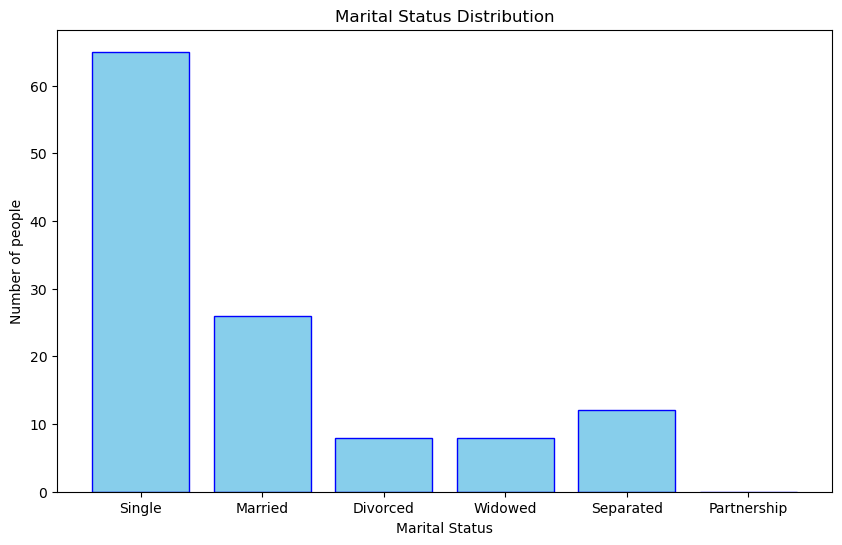

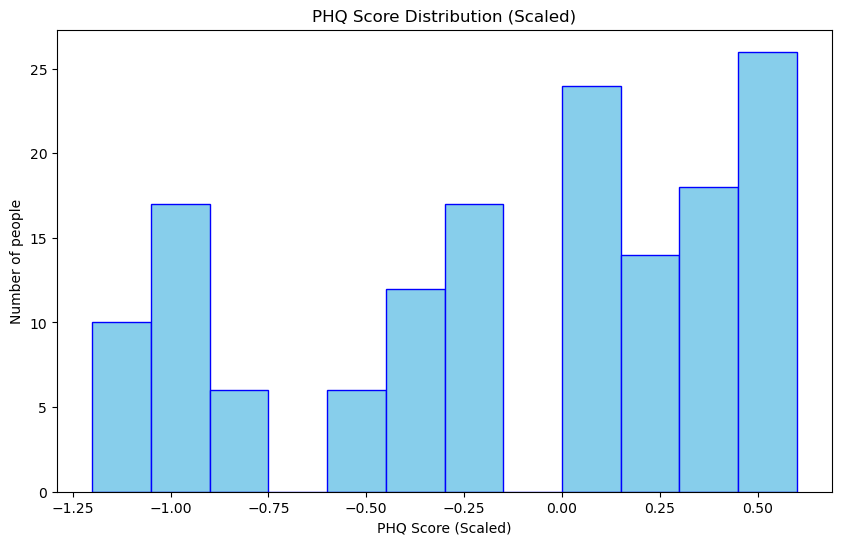

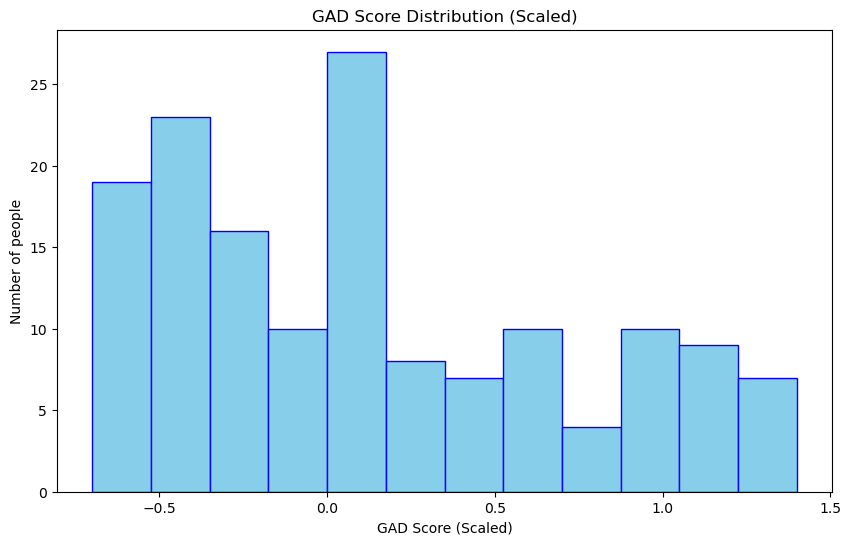

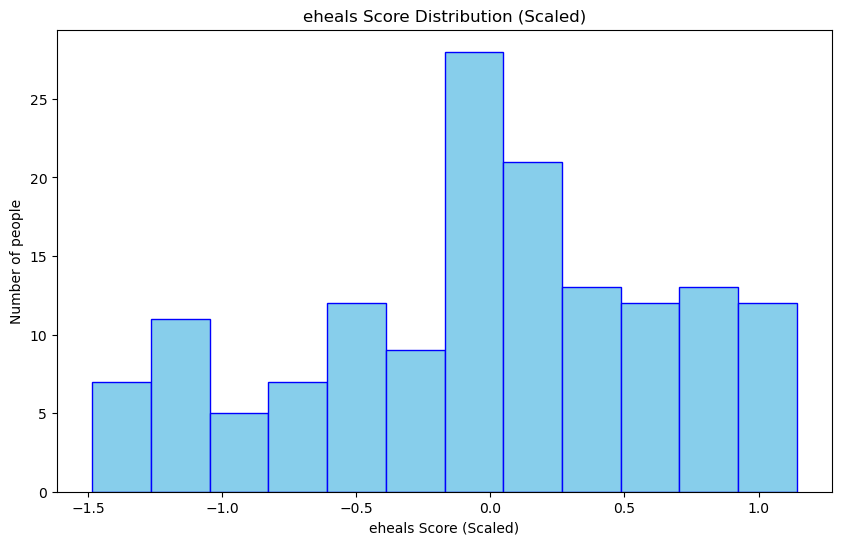

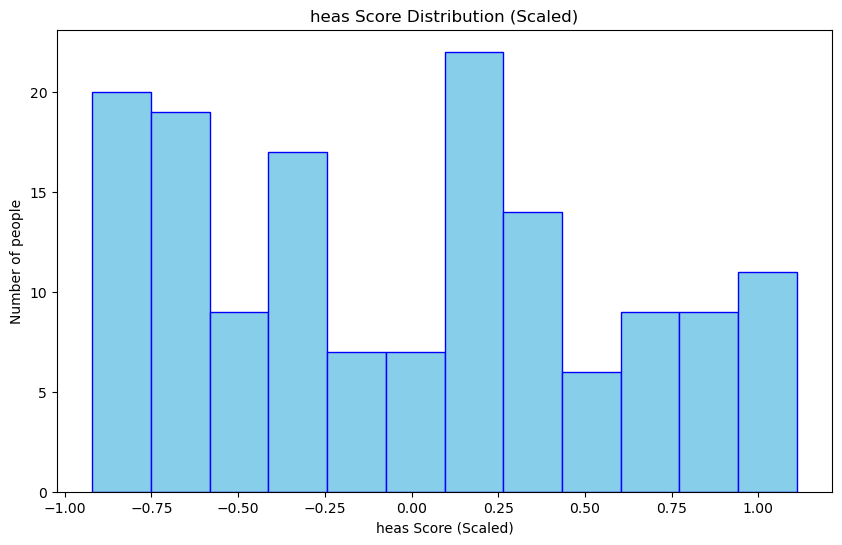

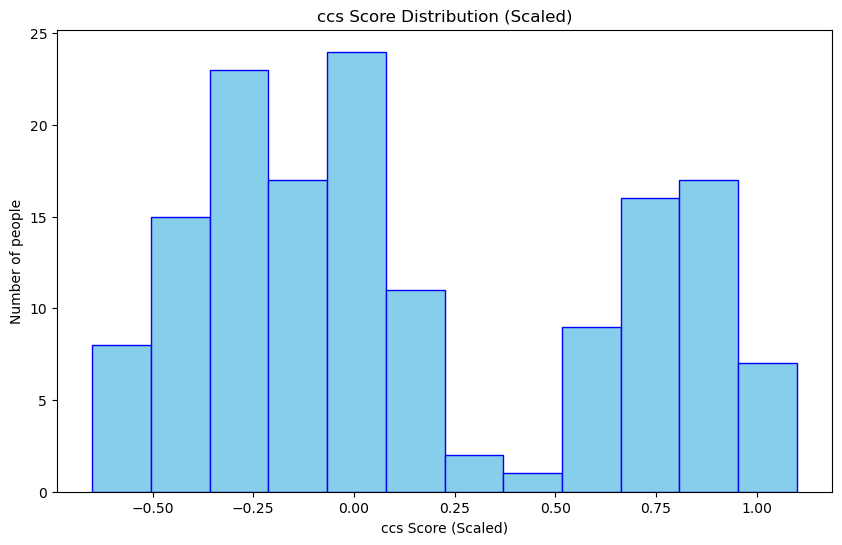

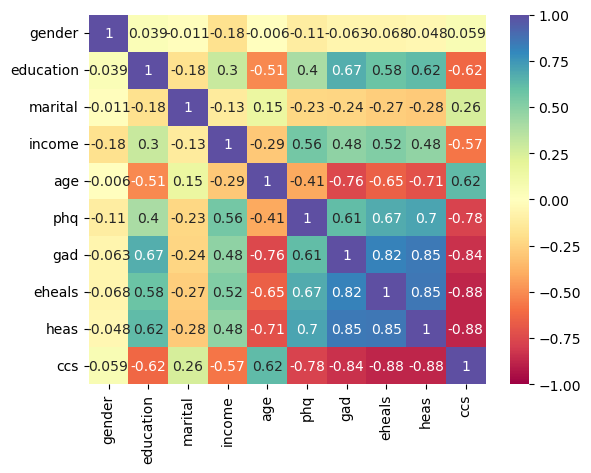

In [341]:

# Original categorical data plotting
# Plot for 'gender' using the original data from 'df_sum'
plt.figure(figsize=(10, 6))
df_no_outliers['gender'].value_counts().sort_index().plot(kind='bar', color='skyblue', ec='blue')
plt.xlabel('Gender')
plt.ylabel('Number of people')
plt.title('Gender Distribution')
plt.xticks(ticks=np.arange(4), labels=['Male', 'Female', 'Non-binary', 'Prefer not to say'], rotation=0)
plt.show()

# Plot for 'education' using the original data from 'df_sum'
plt.figure(figsize=(10, 6))
education_bins = np.arange(4.5, 26.5)  # Assuming education levels are discrete from 5 to 25
df_no_outliers['education'].plot(kind='hist', bins=education_bins, color='skyblue', ec='blue', rwidth=0.8)
plt.xlabel('Education Level')
plt.ylabel('Number of people')
plt.title('Education Level Distribution')
labels_edu = ['Elem.', 'Middle', 'High', 'Bachelor', 'Master', 'Doctoral']
plt.xticks(ticks=np.arange(5, 26, 4), labels=labels_edu, rotation=0)  # Adjust ticks as necessary
plt.show()

# Plot for 'marital' using the original data from 'df_sum'
plt.figure(figsize=(10, 6))
marital_bins = np.arange(-0.5, 6.5)  # Assuming marital status ranges from 0 to 5
df_no_outliers['marital'].plot(kind='hist', bins=marital_bins, color='skyblue', ec='blue', rwidth=0.8)
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.title('Marital Status Distribution')
labels_marital = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Partnership'] # Adjust labels if needed
plt.xticks(ticks=np.arange(6), labels=labels_marital, rotation=0)
plt.show()

# Scaled continuous data plotting from 'df_scaled'
# Determine the number of bins for continuous data using the square root rule
num_samples = df_no_outliers.shape[0]
bins = int(np.sqrt(num_samples))

# Plot for 'phq' using the scaled data from 'df_scaled'
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['phq'], bins=bins, color='skyblue', ec='blue')
plt.xlabel('PHQ Score (Scaled)')
plt.ylabel('Number of people')
plt.title('PHQ Score Distribution (Scaled)')
plt.show()

# Repeat similar plotting for other continuous variables like 'gad', 'eheals', 'heas', 'ccs' from 'df_scaled'
# Example for 'gad'
plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['gad'], bins=bins, color='skyblue', ec='blue')
plt.xlabel('GAD Score (Scaled)')
plt.ylabel('Number of people')
plt.title('GAD Score Distribution (Scaled)')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['eheals'], bins=bins, color='skyblue', ec='blue')
plt.xlabel('eheals Score (Scaled)')
plt.ylabel('Number of people')
plt.title('eheals Score Distribution (Scaled)')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['heas'], bins=bins, color='skyblue', ec='blue')
plt.xlabel('heas Score (Scaled)')
plt.ylabel('Number of people')
plt.title('heas Score Distribution (Scaled)')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['ccs'], bins=bins, color='skyblue', ec='blue')
plt.xlabel('ccs Score (Scaled)')
plt.ylabel('Number of people')
plt.title('ccs Score Distribution (Scaled)')
plt.show()

plt.show()


# study correlation
plt.figure(11)
sns.heatmap(df_no_outliers.corr(), vmin=-1, vmax=1, center=0, cmap='Spectral', annot=True)
plt.show()

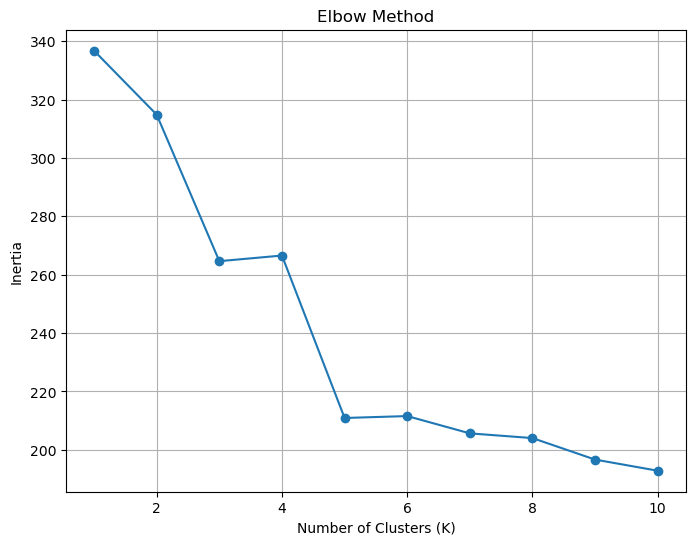

In [342]:
   # elbow method
inertia = []  # empty list to store the sum of squared distances (inertia) for different K values
k_values = range(1, 11)
for k in k_values:
        kmedoids = KMedoids(n_clusters=k, random_state=0)
        kmedoids.fit(df_no_outliers)
        inertia.append(kmedoids.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [343]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score

# Specify the number of clusters (K) and the maximum number of iterations (max_iter)
k = 3
max_iter = 100

# Create a KMedoids instance with a fixed random state
kmedoids = KMedoids(n_clusters=k, max_iter=max_iter, random_state=0)

# Fit the data, ensure df_all is not changing between runs
kmedoids.fit(df_no_outliers)

# Get the cluster assignments
cluster_labels = kmedoids.labels_

# Add the cluster labels to the DataFrame
df_no_outliers['Cluster'] = cluster_labels

# Make sure to exclude the 'Cluster' column when calculating the silhouette score
features_for_scoring = df_no_outliers.drop('Cluster', axis=1)
silhouette_avg = silhouette_score(features_for_scoring, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.20065078526658983


In [344]:
# Print all column names of the DataFrame df_all
print(df_no_outliers.columns.tolist())


['gender', 'education', 'marital', 'income', 'age', 'phq', 'gad', 'eheals', 'heas', 'ccs', 'Cluster']


In [345]:
# Drop the 'Cluster' column
df_no_outliers = df_no_outliers.drop('Cluster', axis=1)

# Verify the column is dropped
print(df_no_outliers.head())


   gender  education  marital    income       age  phq  gad    eheals  \
0    -0.5       -0.8      0.0 -0.932203  0.111111 -0.8 -0.7 -1.485714   
1     0.5        0.5      0.0 -0.508475  0.611111 -1.2 -0.4 -0.571429   
2    -1.0       -0.5      0.0  0.000000  0.000000 -1.0 -0.3 -1.142857   
3    -1.0        1.2      4.0  0.169492 -1.166667 -0.2  1.2  1.142857   
4     0.0        0.0      0.0  0.932203  0.111111  0.0 -0.1 -0.114286   

       heas   ccs  
0 -0.412698  0.60  
1 -0.476190  0.75  
2 -0.793651  0.85  
3  0.349206 -0.50  
4  0.095238  0.05  


In [346]:

from prince import FAMD
from sklearn_extra.cluster import KMedoids
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame `df_famd`
# df_famd = pd.read_csv('your_data.csv')
# List of categorical columns
categorical_columns = ["gender", "education", "marital"]

# Convert each column to 'category' type
for column in categorical_columns:
    df_no_outliers[column] = df_no_outliers[column].astype('category')


# Step 1: Apply FAMD to reduce the dimensionality of mixed data
famd = FAMD(n_components=6, n_iter=5, random_state=42)
famd = famd.fit(df_no_outliers)

# Transform the dataset (projection of the original dataset into the FAMD space)
data_transformed = famd.transform(df_no_outliers)

# Step 2: Apply K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42).fit(data_transformed)

# Get the cluster labels for each data point
labels = kmedoids.labels_
# Make sure to exclude the 'Cluster' column when calculating the silhouette score


In [347]:
data_transformed

component,0,1,2,3,4,5
0,-3.596655,3.206843,1.346260,2.165182,1.522352,-0.772023
1,-2.320497,0.863679,-2.155473,-0.989737,0.222942,0.235927
2,-2.830201,-0.449359,-0.272261,0.146395,-1.087061,-1.159704
3,3.620285,1.447950,-0.257423,3.429414,1.363059,-2.918236
4,0.171055,-2.296085,-0.803441,1.295181,0.211757,0.559444
...,...,...,...,...,...,...
145,2.927568,0.575543,-0.992704,-0.006845,-1.094681,2.000669
146,0.662566,0.565122,1.147495,3.046813,0.292456,0.318453
147,0.400938,-0.400840,0.011372,-0.112916,-1.120546,0.256254
148,-2.588527,0.194809,0.664317,0.133763,0.770817,-0.037796


Explained Variance: [0.40403379 0.54642094 0.67156302 0.78684483 0.89682224 1.        ]


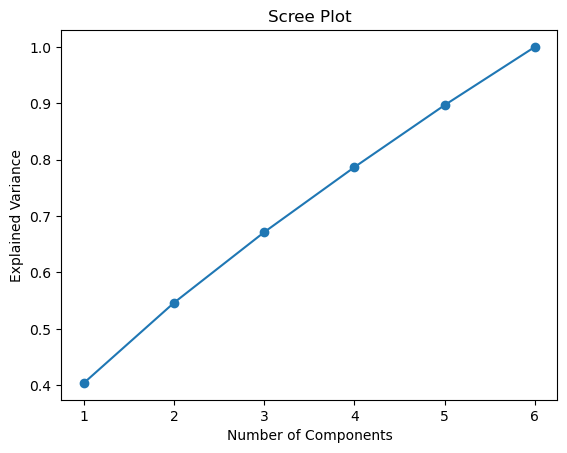

In [348]:
# compute explained variance -> the sum is always 1 by definition
# this means that to understand how many components we have to use, we have to do the scree plot and search for the elbow
eigenvalues = famd.eigenvalues_
explained_variance = eigenvalues / eigenvalues.sum()
cumulative_variance=np.cumsum(explained_variance)
print(f'Explained Variance: {cumulative_variance}')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

# pip install --upgrade prince


In [349]:
from sklearn.metrics import silhouette_score

print(f"Silhouette Score: {silhouette_avg}")

# Assuming `data_transformed` is the DataFrame without the cluster labels
# and `labels` are the cluster labels obtained from K-Medoids

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_transformed, labels)

print(f"The average silhouette_score is: {silhouette_avg}")


Silhouette Score: 0.20065078526658983
The average silhouette_score is: 0.14553496687493245


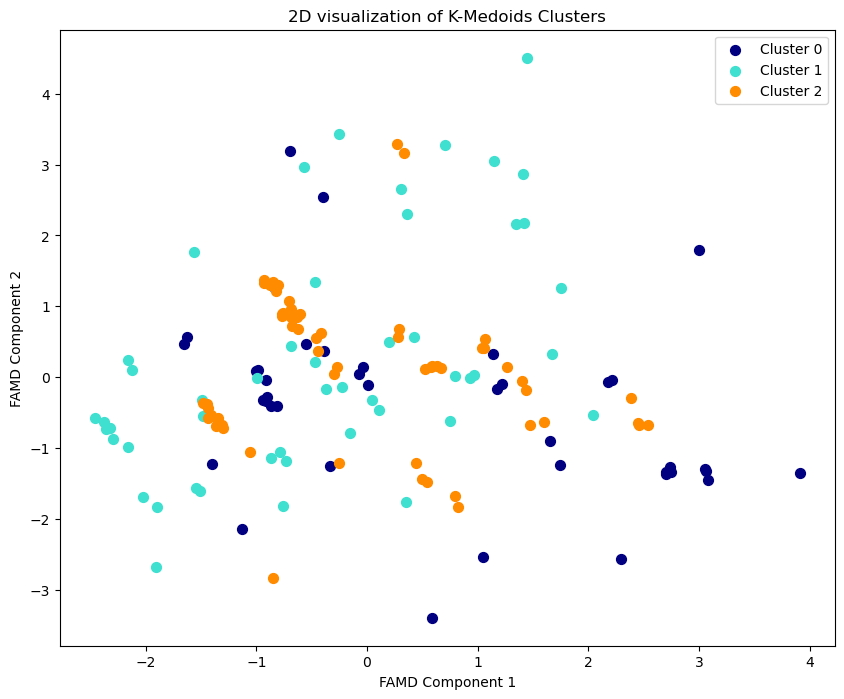

In [375]:
import matplotlib.pyplot as plt

# Assuming `data_transformed` is the transformed DataFrame and `labels` \1qare the cluster labels from K-Medoids

# Plot the clusters
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange']

for cluster, color in zip(range(3), colors):
    # Select only data observations with cluster label == current cluster
    cluster_data = data_transformed[labels == cluster]
    # Plot data observations
    plt.scatter(cluster_data[2], cluster_data[3], s=50, color=color, label=f'Cluster {cluster}')

# Label the axes
plt.title('2D visualization of K-Medoids Clusters')
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')

# Show legend
plt.legend()

# Show plot
plt.show()


In [351]:
df_sum

,gender,education,marital,income,age,phq,gad,eheals,heas,ccs
0,1,5.0,1,18000,42.0,2.0,0.0,17.0,8.0,33.0
1,3,18.0,1,23000,51.0,0.0,3.0,25.0,7.0,36.0
2,0,8.0,1,10000,40.0,1.0,4.0,20.0,2.0,38.0
3,0,25.0,5,31000,19.0,5.0,19.0,40.0,20.0,11.0
4,2,13.0,1,40000,42.0,6.0,6.0,29.0,16.0,22.0
...,...,...,...,...,...,...,...,...,...,...
145,2,18.0,0,25000,29.0,7.0,13.0,38.0,30.0,16.0
146,1,13.0,5,27000,40.0,9.0,7.0,31.0,16.0,21.0
147,0,13.0,0,26000,40.0,5.0,6.0,32.0,10.0,25.0
148,1,8.0,1,11000,41.0,1.0,2.0,26.0,3.0,34.0


In [352]:
df_numerical

,age,income,eheals,heas,ccs,gad,phq
0,42.0,18000,17.0,8.0,33.0,0.0,2.0
1,51.0,23000,25.0,7.0,36.0,3.0,0.0
2,40.0,10000,20.0,2.0,38.0,4.0,1.0
3,19.0,31000,40.0,20.0,11.0,19.0,5.0
4,42.0,40000,29.0,16.0,22.0,6.0,6.0
...,...,...,...,...,...,...,...
145,29.0,25000,38.0,30.0,16.0,13.0,7.0
146,40.0,27000,31.0,16.0,21.0,7.0,9.0
147,40.0,26000,32.0,10.0,25.0,6.0,5.0
148,41.0,11000,26.0,3.0,34.0,2.0,1.0


In [353]:
categorical_columns = ['gender', 'marital','education']
df_categorical1 = df_sum[categorical_columns].copy()
df_categorical1

,gender,marital,education
0,1,1,5.0
1,3,1,18.0
2,0,1,8.0
3,0,5,25.0
4,2,1,13.0
...,...,...,...
145,2,0,18.0
146,1,5,13.0
147,0,0,13.0
148,1,1,8.0


In [354]:
from scipy.stats import chi2_contingency

df_numerical['Cluster'] = labels
print(df_numerical)

#Kruskal-Wallis Test for df_numerical
feature_numerical = [col for col in df_numerical.columns if col != "Cluster"]
for feature in feature_numerical:
    groups = [df_numerical[df_numerical['Cluster'] == cluster][[feature]] for cluster in df_numerical['Cluster'].unique()]
    stat, p = stats.kruskal(*groups)
    print(f"Kruskal-Wallis Test for {feature}:")
    print("Kruskal-Wallis H-statistic:", stat)
    print("p-value:", p)

# Mann-Whitney U test
feature_names = []
cluster1_values = []
cluster2_values = []
original_p_values = []
corrected_p_values = []
reject_hypothesis = []
for feature in feature_numerical:
    clusters = df_numerical['Cluster'].unique()
    for i, cluster1 in enumerate(clusters):
        for j, cluster2 in enumerate(clusters):
            if i >= j:
                # Skip comparisons of a cluster with itself and duplicate comparisons
                continue

            group1 = df_numerical[df_numerical['Cluster'] == cluster1][feature]
            group2 = df_numerical[df_numerical['Cluster'] == cluster2][feature]
            group1 = np.array(group1)
            group2 = np.array(group2)
            stat, p = stats.mannwhitneyu(group1, group2)
            # Bonferroni correction
            alpha = 0.05
            reject, corrected_p_value, _, _ = multipletests(p, alpha=alpha, method='bonferroni')
            feature_names.append(feature)
            cluster1_values.append(cluster1)
            cluster2_values.append(cluster2)
            original_p_values.append(p)
            corrected_p_values.append(corrected_p_value[0])
            reject_hypothesis.append(reject[0])
# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Cluster1': cluster1_values,
    'Cluster2': cluster2_values,
    'Original p-values': original_p_values,
    'Corrected p-values (Bonferroni)': corrected_p_values,
    'Reject Null Hypothesis': reject_hypothesis
})
print(results_df)


df_categorical1['Cluster'] = labels
print(df_categorical1)

# Create a contingency table
columns_to_test = ['gender', 'education', 'marital']
results = []
for column in columns_to_test:
    contingency_table = pd.crosstab(df_categorical1[column], df_categorical1['Cluster'])
    # Print the contingency table and its shape
    print(f"\nContingency Table for {column}:")
    print(contingency_table)
    print(f"Shape: {contingency_table.shape}")
    # Fisher's exact test is only performed on 2x2 tables (variables with 2 categories), so we don't do it
    # Chi-square test
    chi2_stat, chi2_p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square Test for {column}: Statistic - {chi2_stat}, P-Value - {chi2_p_value}")
    results.append({
        'Variable': column,
        'Chi2_Statistic': chi2_stat,
        'Chi2_P_Value': chi2_p_value
    })

# Bonferroni correction
alpha = 0.05
correction_method = 'bonferroni'
p_values = [result['Chi2_P_Value'] for result in results]
reject, corrected_p_values, _, _ = multipletests(p_values, alpha=alpha, method=correction_method)
# Update the results with corrected p-values
for i, result in enumerate(results):
    result['Chi2_Corrected_P_Value'] = corrected_p_values[i]
# Print the results with corrected p-values
for result in results:
    print(f"\nResults for {result['Variable']}:")
    print(f"Chi-square Test - Statistic: {result['Chi2_Statistic']}, Corrected P-Value: {result['Chi2_Corrected_P_Value']}")


      age  income  eheals  heas   ccs   gad  phq  Cluster
0    42.0   18000    17.0   8.0  33.0   0.0  2.0        1
1    51.0   23000    25.0   7.0  36.0   3.0  0.0        1
2    40.0   10000    20.0   2.0  38.0   4.0  1.0        2
3    19.0   31000    40.0  20.0  11.0  19.0  5.0        1
4    42.0   40000    29.0  16.0  22.0   6.0  6.0        2
..    ...     ...     ...   ...   ...   ...  ...      ...
145  29.0   25000    38.0  30.0  16.0  13.0  7.0        1
146  40.0   27000    31.0  16.0  21.0   7.0  9.0        1
147  40.0   26000    32.0  10.0  25.0   6.0  5.0        0
148  41.0   11000    26.0   3.0  34.0   2.0  1.0        2
149  55.0   32199    26.0   4.0  33.0   3.0  0.0        2

[150 rows x 8 columns]
Kruskal-Wallis Test for age:
Kruskal-Wallis H-statistic: [52.44700182]
p-value: [4.08581086e-12]
Kruskal-Wallis Test for income:
Kruskal-Wallis H-statistic: [28.25193932]
p-value: [7.33110305e-07]
Kruskal-Wallis Test for eheals:
Kruskal-Wallis H-statistic: [49.27466315]
p-value: 

/var/folders/j7/v7xb9mqn14g_kf8pd00jf_m80000gn/T/ipykernel_93568/183954029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Cluster'] = labels


In [355]:
df_categorical1

,gender,marital,education,Cluster
0,1,1,5.0,1
1,3,1,18.0,1
2,0,1,8.0,2
3,0,5,25.0,1
4,2,1,13.0,2
...,...,...,...,...
145,2,0,18.0,1
146,1,5,13.0,1
147,0,0,13.0,0
148,1,1,8.0,2


In [356]:
cluster_summary = df_numerical.groupby('Cluster').mean()
print(cluster_summary)


           age   income     eheals   heas     ccs        gad       phq
Cluster                                                               
0        31.80  35585.0  34.675000  20.85  15.575  12.525000  7.125000
1        35.24  26180.0  29.700000  15.70  22.920   9.200000  5.280000
2        46.50  27446.6  26.516667   8.05  30.050   4.333333  4.183333


In [357]:
cluster_summary = df_categorical1.groupby('Cluster').mean()
print(cluster_summary)


           gender   marital  education
Cluster                               
0        0.950000  1.275000  17.500000
1        1.880000  1.860000  15.620000
2        1.733333  1.483333  10.583333


In [358]:
# Initialize an empty DataFrame to store categorical summaries
cluster_summary_categorical = pd.DataFrame()

for column in df_categorical1.columns:
    if column != 'Cluster':
        # Calculate frequency count
        count_summary = pd.crosstab(df_categorical1['Cluster'], df_categorical1[column])
        
        # Reshape and concatenate
        count_summary = count_summary.stack().reset_index().rename(columns={0: f'{column}_count'})
        if cluster_summary_categorical.empty:
            cluster_summary_categorical = count_summary
        else:
            cluster_summary_categorical = pd.merge(cluster_summary_categorical, count_summary, on='Cluster', how='outer')


In [359]:
cluster_summary_categorical

,Cluster,gender,gender_count,marital,marital_count,education,education_count
0,0,0,19,0,18,5.0,0
1,0,0,19,0,18,8.0,4
2,0,0,19,0,18,13.0,8
3,0,0,19,0,18,18.0,13
4,0,0,19,0,18,22.0,15
...,...,...,...,...,...,...,...
427,2,3,17,5,2,8.0,29
428,2,3,17,5,2,13.0,31
429,2,3,17,5,2,18.0,0
430,2,3,17,5,2,22.0,0


In [360]:
cluster_summary_categorical_mode = df_categorical1.groupby('Cluster').agg(pd.Series.mode)

# Get frequency counts for each category, but store them in a more compact form
for column in df_categorical1.columns:
    if column != 'Cluster':
        count_summary = pd.crosstab(df_categorical1['Cluster'], df_categorical1[column])
        # Convert the frequency counts to a string or dictionary per cluster
        cluster_summary_categorical_mode[column + '_freq'] = count_summary.apply(lambda x: x.to_dict(), axis=1)


In [361]:
cluster_summary_categorical_mode

,gender,marital,education,gender_freq,marital_freq,education_freq
Cluster,,,,,,
0,0,0,22.0,"{0: 19, 1: 8, 2: 9, 3: 4}","{0: 18, 1: 6, 2: 9, 3: 4, 4: 0, 5: 3}","{5.0: 0, 8.0: 4, 13.0: 8, 18.0: 13, 22.0: 15, ..."
1,3,1,18.0,"{0: 4, 1: 20, 2: 4, 3: 22}","{0: 13, 1: 20, 2: 0, 3: 2, 4: 8, 5: 7}","{5.0: 7, 8.0: 3, 13.0: 11, 18.0: 20, 22.0: 2, ..."
2,2,1,13.0,"{0: 11, 1: 11, 2: 21, 3: 17}","{0: 0, 1: 39, 2: 17, 3: 2, 4: 0, 5: 2}","{5.0: 0, 8.0: 29, 13.0: 31, 18.0: 0, 22.0: 0, ..."


In [362]:
cluster_summary_numerical = df_numerical.groupby('Cluster').mean()
cluster_summary_numerical

,age,income,eheals,heas,ccs,gad,phq
Cluster,,,,,,,
0,31.80,35585.0,34.675000,20.85,15.575,12.525000,7.125000
1,35.24,26180.0,29.700000,15.70,22.920,9.200000,5.280000
2,46.50,27446.6,26.516667,8.05,30.050,4.333333,4.183333


In [363]:
combined_summary = pd.concat([cluster_summary_numerical, cluster_summary_categorical_mode], axis=1)


In [364]:
combined_summary

,age,income,eheals,heas,ccs,gad,phq,gender,marital,education,gender_freq,marital_freq,education_freq
Cluster,,,,,,,,,,,,,
0,31.80,35585.0,34.675000,20.85,15.575,12.525000,7.125000,0,0,22.0,"{0: 19, 1: 8, 2: 9, 3: 4}","{0: 18, 1: 6, 2: 9, 3: 4, 4: 0, 5: 3}","{5.0: 0, 8.0: 4, 13.0: 8, 18.0: 13, 22.0: 15, ..."
1,35.24,26180.0,29.700000,15.70,22.920,9.200000,5.280000,3,1,18.0,"{0: 4, 1: 20, 2: 4, 3: 22}","{0: 13, 1: 20, 2: 0, 3: 2, 4: 8, 5: 7}","{5.0: 7, 8.0: 3, 13.0: 11, 18.0: 20, 22.0: 2, ..."
2,46.50,27446.6,26.516667,8.05,30.050,4.333333,4.183333,2,1,13.0,"{0: 11, 1: 11, 2: 21, 3: 17}","{0: 0, 1: 39, 2: 17, 3: 2, 4: 0, 5: 2}","{5.0: 0, 8.0: 29, 13.0: 31, 18.0: 0, 22.0: 0, ..."


In [365]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [366]:
combined_summary.to_excel("cluster_summary_20-11-2023.xlsx")


In [367]:
cluster_counts = df_numerical['Cluster'].value_counts()
print(cluster_counts)


2    60
1    50
0    40
Name: Cluster, dtype: int64


In [368]:
# Replace 'column1' and 'column2' with the actual names of your numerical columns.
df_sum['gad'] = df_sum['gad'].apply(lambda x: 1 if x >= 10 else 0)
df_sum['phq'] = df_sum['phq'].apply(lambda x: 1 if x >= 5 else 0)


In [369]:
df_gad = pd.concat([df_sum, df_numerical['Cluster']], axis=1)

# Display the first few rows of the combined DataFrame
print(df_gad.head())

   gender  education  marital  income   age  phq  gad  eheals  heas   ccs  \
0       1        5.0        1   18000  42.0    0    0    17.0   8.0  33.0   
1       3       18.0        1   23000  51.0    0    0    25.0   7.0  36.0   
2       0        8.0        1   10000  40.0    0    0    20.0   2.0  38.0   
3       0       25.0        5   31000  19.0    1    1    40.0  20.0  11.0   
4       2       13.0        1   40000  42.0    1    0    29.0  16.0  22.0   

   Cluster  
0        1  
1        1  
2        2  
3        1  
4        2  


In [370]:
# Calculate counts and percentages for 'gad'
# Assuming your DataFrame is named df_gad and it contains the columns 'Cluster', 'gad', and 'phq'

# Counting the occurrences of 0 and 1 in 'gad' for each cluster
gad_cluster_counts = df_gad.groupby('Cluster')['gad'].value_counts().unstack(fill_value=0)

# Counting the occurrences of 0 and 1 in 'phq' for each cluster
phq_cluster_counts = df_gad.groupby('Cluster')['phq'].value_counts().unstack(fill_value=0)

# Display the results
print("GAD Counts by Cluster:")
print(gad_cluster_counts)
print("\nPHQ Counts by Cluster:")
print(phq_cluster_counts)


GAD Counts by Cluster:
gad       0   1
Cluster        
0        13  27
1        27  23
2        60   0

PHQ Counts by Cluster:
phq       0   1
Cluster        
0         1  39
1        18  32
2        32  28


In [371]:
# Counting and normalizing the occurrences of 0 and 1 in 'gad' for each cluster
gad_cluster_percentages = df_gad.groupby('Cluster')['gad'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Counting and normalizing the occurrences of 0 and 1 in 'phq' for each cluster
phq_cluster_percentages = df_gad.groupby('Cluster')['phq'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Display the results
print("GAD Percentages by Cluster:")
print(gad_cluster_percentages)
print("\nPHQ Percentages by Cluster:")
print(phq_cluster_percentages)


GAD Percentages by Cluster:
gad          0     1
Cluster             
0         32.5  67.5
1         54.0  46.0
2        100.0   0.0

PHQ Percentages by Cluster:
phq              0          1
Cluster                      
0         2.500000  97.500000
1        36.000000  64.000000
2        53.333333  46.666667


In [372]:
df_numerical

,age,income,eheals,heas,ccs,gad,phq,Cluster
0,42.0,18000,17.0,8.0,33.0,0.0,2.0,1
1,51.0,23000,25.0,7.0,36.0,3.0,0.0,1
2,40.0,10000,20.0,2.0,38.0,4.0,1.0,2
3,19.0,31000,40.0,20.0,11.0,19.0,5.0,1
4,42.0,40000,29.0,16.0,22.0,6.0,6.0,2
...,...,...,...,...,...,...,...,...
145,29.0,25000,38.0,30.0,16.0,13.0,7.0,1
146,40.0,27000,31.0,16.0,21.0,7.0,9.0,1
147,40.0,26000,32.0,10.0,25.0,6.0,5.0,0
148,41.0,11000,26.0,3.0,34.0,2.0,1.0,2


In [373]:
# Initialize an empty DataFrame to store basic statistics for all columns
all_stats = pd.DataFrame()

# Initialize an empty dictionary to store count and percentage DataFrames for all columns
all_counts = {}
all_percentages = {}

for column in df_numerical.columns:
    if column != 'Cluster':
        # Basic statistics
        stats = df_numerical.groupby('Cluster')[column].agg(['mean', 'median', 'std'])
        all_stats[column] = stats.stack()

        # Count and percentage of each category in the column for each cluster
        counts = df_numerical.groupby('Cluster')[column].value_counts().unstack(fill_value=0)
        percentages = counts.divide(counts.sum(axis=1), axis=0) * 100

        all_counts[column] = counts
        all_percentages[column] = percentages

# Reshape the all_stats DataFrame for better readability
all_stats = all_stats.unstack().swaplevel(0, 1, axis=1).sort_index(axis=1)

# Display the results
print("All Basic Statistics by Cluster:")
print(all_stats)
print("\nAll Counts by Cluster:")
for column, counts in all_counts.items():
    print(f"\nCount for {column}:")
    print(counts)
print("\nAll Percentages by Cluster:")
for column, percentages in all_percentages.items():
    print(f"\nPercentage for {column}:")
    print(percentages)


All Basic Statistics by Cluster:
          mean                                                         median  \
           age     ccs     eheals        gad   heas   income       phq    age   
Cluster                                                                         
0        31.80  15.575  34.675000  12.525000  20.85  35585.0  7.125000   32.0   
1        35.24  22.920  29.700000   9.200000  15.70  26180.0  5.280000   36.5   
2        46.50  30.050  26.516667   4.333333   8.05  27446.6  4.183333   48.0   

                      ...                            std                       \
          ccs eheals  ...  heas   income  phq        age        ccs    eheals   
Cluster               ...                                                       
0        14.5   35.0  ...  20.0  35000.0  7.0   9.522443   4.612622  3.466969   
1        18.5   31.5  ...  17.5  27000.0  6.0  10.927516  10.655726  7.149283   
2        33.0   28.0  ...   7.0  28000.0  4.0   6.021149   8.618909  4.3666